# Data Analysis With Python

In [2]:
# Importing Libaries ToolKit
#%load_ext cudf.pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pickle
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split , cross_val_score , RepeatedStratifiedKFold
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score , classification_report , accuracy_score , confusion_matrix

# Exploring a DataFrame

In [4]:
# Importing & Inspecting Data
data = pd.read_csv('Covid Data.csv')

This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.
sex: female or male
age: of the patient.
classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
patient type: hospitalized or not hospitalized.
pneumonia: whether the patient already have air sacs inflammation or not.
pregnancy: whether the patient is pregnant or not.
diabetes: whether the patient has diabetes or not.
copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
asthma: whether the patient has asthma or not.
inmsupr: whether the patient is immunosuppressed or not.
hypertension: whether the patient has hypertension or not.
cardiovascular: whether the patient has heart or blood vessels related disease.
renal chronic: whether the patient has chronic renal disease or not.
other disease: whether the patient has other disease or not.
obesity: whether the patient is obese or not.
tobacco: whether the patient is a tobacco user.
usmr: Indicates whether the patient treated medical units of the first, second or third level.
medical unit: type of institution of the National Health System that provided the care.
intubed: whether the patient was connected to the ventilator.
icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
death: indicates whether the patient died or recovered.

In [5]:
data.head(10)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
5,2,1,1,2,9999-99-99,2,1,40,2,2,...,2,2,2,2,2,2,2,2,3,2
6,2,1,1,1,9999-99-99,97,2,64,2,2,...,2,2,2,2,2,2,2,2,3,97
7,2,1,1,1,9999-99-99,97,1,64,2,1,...,2,1,1,2,2,2,1,2,3,97
8,2,1,1,2,9999-99-99,2,2,37,2,1,...,2,2,1,2,2,1,2,2,3,2
9,2,1,1,2,9999-99-99,2,2,25,2,2,...,2,2,2,2,2,2,2,2,3,2


In [6]:
data.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [8]:
data.shape

(1048575, 21)

In [9]:
# Handle Missing Values
print(data.isna().sum())

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64


In [10]:
threshold = len(data) * 0.09
print(threshold)

94371.75


In [11]:
cols_to_drop = data.columns[data.isna().sum() <= threshold]
print(cols_to_drop)


Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')


In [12]:
print(data.isna().sum())

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64


In [13]:
cols_with_missing_values = data.columns[data.isna().sum() > 0]
print(cols_with_missing_values)

Index([], dtype='object')


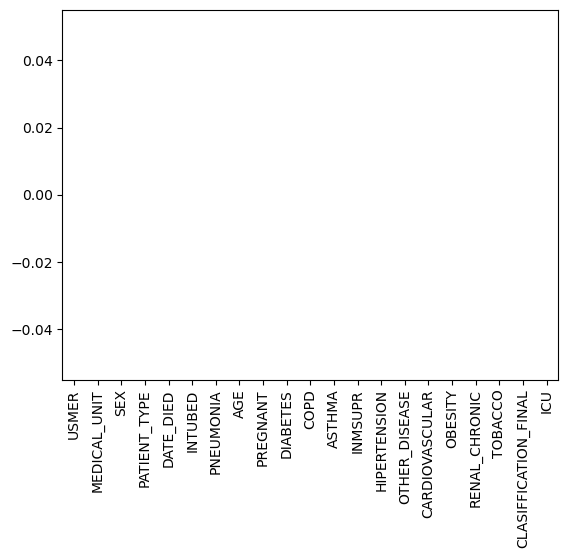

In [14]:
#Plotting missing values
data.isna().sum().plot(kind="bar")
plt.show()


In [15]:
# No more missing values!
print(data.isna().sum())

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64


In [16]:
# check duplicated values
data.duplicated().sum()

812049

In [17]:
# find the outlier and handle 
data.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [18]:
print("Shape of data :",data.shape)
data.head()

Shape of data : (1048575, 21)


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [19]:
for i in data.columns:
    print(i,"=>\t",len(data[i].unique()))

USMER =>	 2
MEDICAL_UNIT =>	 13
SEX =>	 2
PATIENT_TYPE =>	 2
DATE_DIED =>	 401
INTUBED =>	 4
PNEUMONIA =>	 3
AGE =>	 121
PREGNANT =>	 4
DIABETES =>	 3
COPD =>	 3
ASTHMA =>	 3
INMSUPR =>	 3
HIPERTENSION =>	 3
OTHER_DISEASE =>	 3
CARDIOVASCULAR =>	 3
OBESITY =>	 3
RENAL_CHRONIC =>	 3
TOBACCO =>	 3
CLASIFFICATION_FINAL =>	 7
ICU =>	 4


In [20]:
data.DATE_DIED.value_counts()


9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64

In [21]:
data.PNEUMONIA.value_counts()

2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64

In [22]:
data = data[(data.PNEUMONIA == 1) | (data.PNEUMONIA == 2)]
data = data[(data.DIABETES == 1) | (data.DIABETES == 2)]
data = data[(data.COPD == 1) | (data.COPD == 2)]
data = data[(data.ASTHMA == 1) | (data.ASTHMA == 2)]
data = data[(data.INMSUPR == 1) | (data.INMSUPR == 2)]
data = data[(data.HIPERTENSION == 1) | (data.HIPERTENSION == 2)]
data = data[(data.OTHER_DISEASE == 1) | (data.OTHER_DISEASE == 2)]
data = data[(data.CARDIOVASCULAR == 1) | (data.CARDIOVASCULAR == 2)]
data = data[(data.OBESITY == 1) | (data.OBESITY == 2)]
data = data[(data.RENAL_CHRONIC == 1) | (data.RENAL_CHRONIC == 2)]
data = data[(data.TOBACCO == 1) | (data.TOBACCO == 2)]

In [23]:
data["DEATH"] = [2 if each=="9999-99-99" else 1 for each in data.DATE_DIED]

Text(0.5, 1.0, 'PREGNANCIES - SEX')

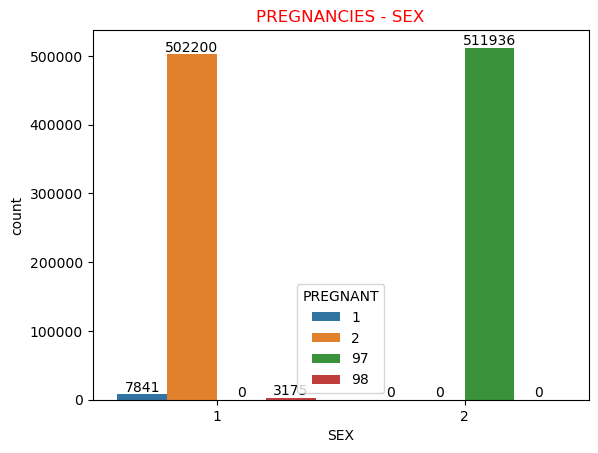

In [24]:
plt.figure()
ax = sns.countplot(data=data, x='SEX', hue='PREGNANT')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("PREGNANCIES - SEX", color="red")


In [25]:
# Converting process according to inference above
data.PREGNANT = data.PREGNANT.replace(97,2)

# Getting rid of the missing values
data = data[(data.PREGNANT == 1) | (data.PREGNANT == 2)]

In [26]:
data.drop(columns=["INTUBED","ICU","DATE_DIED"], inplace=True)

In [27]:
for i in data.columns:
    print(i,"=>\t",len(data[i].unique()))

USMER =>	 2
MEDICAL_UNIT =>	 13
SEX =>	 2
PATIENT_TYPE =>	 2
PNEUMONIA =>	 2
AGE =>	 121
PREGNANT =>	 2
DIABETES =>	 2
COPD =>	 2
ASTHMA =>	 2
INMSUPR =>	 2
HIPERTENSION =>	 2
OTHER_DISEASE =>	 2
CARDIOVASCULAR =>	 2
OBESITY =>	 2
RENAL_CHRONIC =>	 2
TOBACCO =>	 2
CLASIFFICATION_FINAL =>	 7
DEATH =>	 2


# Data visulization 

In [28]:
data.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'PNEUMONIA', 'AGE',
       'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'CLASIFFICATION_FINAL', 'DEATH'],
      dtype='object')

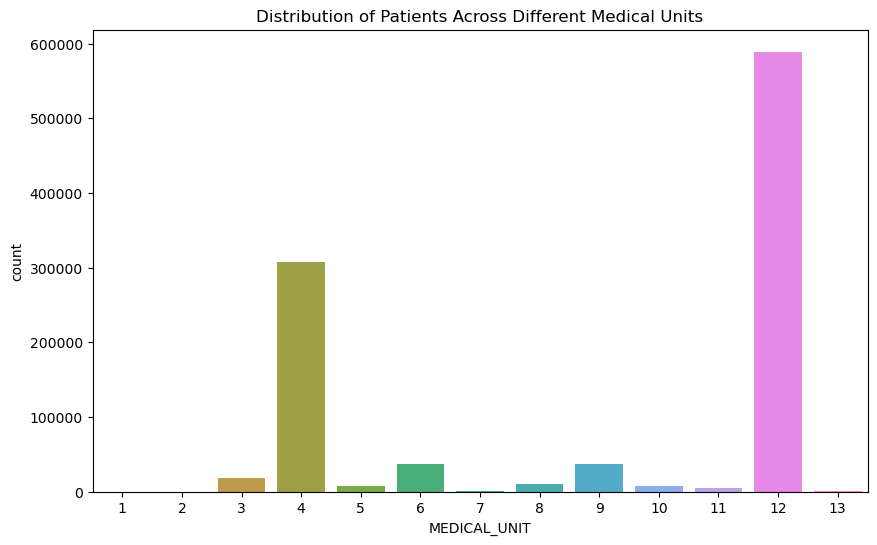

In [29]:
#How is the distribution of patients across different medical units?
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='MEDICAL_UNIT')
plt.title('Distribution of Patients Across Different Medical Units')
plt.show()

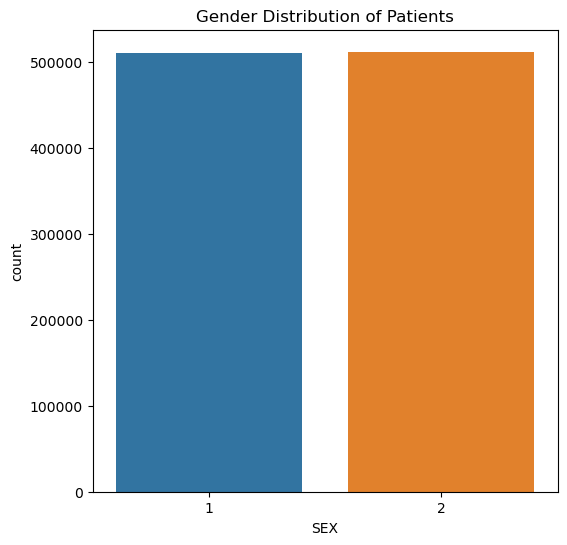

In [30]:
#What is the gender distribution of patients?
plt.figure(figsize=(6, 6))
sns.countplot(data=data, x='SEX')
plt.title('Gender Distribution of Patients')
plt.show()


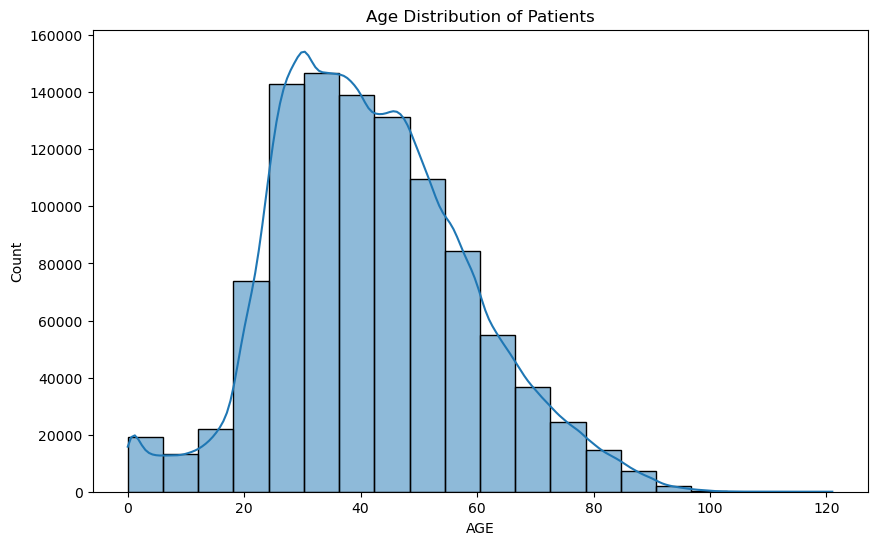

In [31]:
#What is the age distribution of patients?
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='AGE', bins=20, kde=True)
plt.title('Age Distribution of Patients')
plt.show()


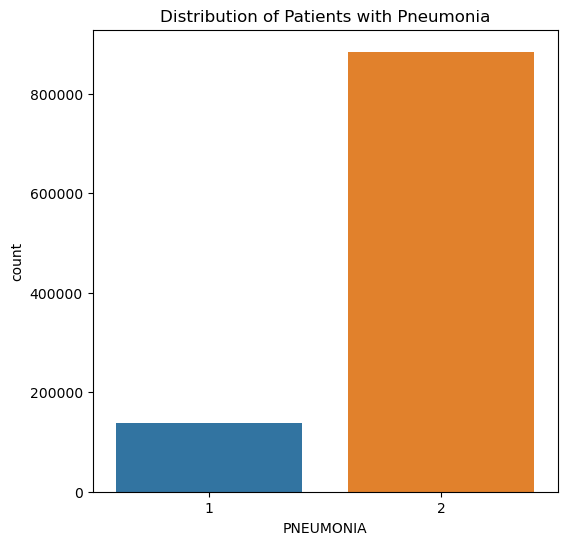

Number of patients with pneumonia: 1906591


In [34]:
#How many patients have pneumonia?
# Countplot for Pneumonia
plt.figure(figsize=(6, 6))
sns.countplot(data=data, x='PNEUMONIA')
plt.title('Distribution of Patients with Pneumonia')
plt.show()

# Count the number of patients with pneumonia
pneumonia_count = data['PNEUMONIA'].sum()
print(f"Number of patients with pneumonia: {pneumonia_count}")

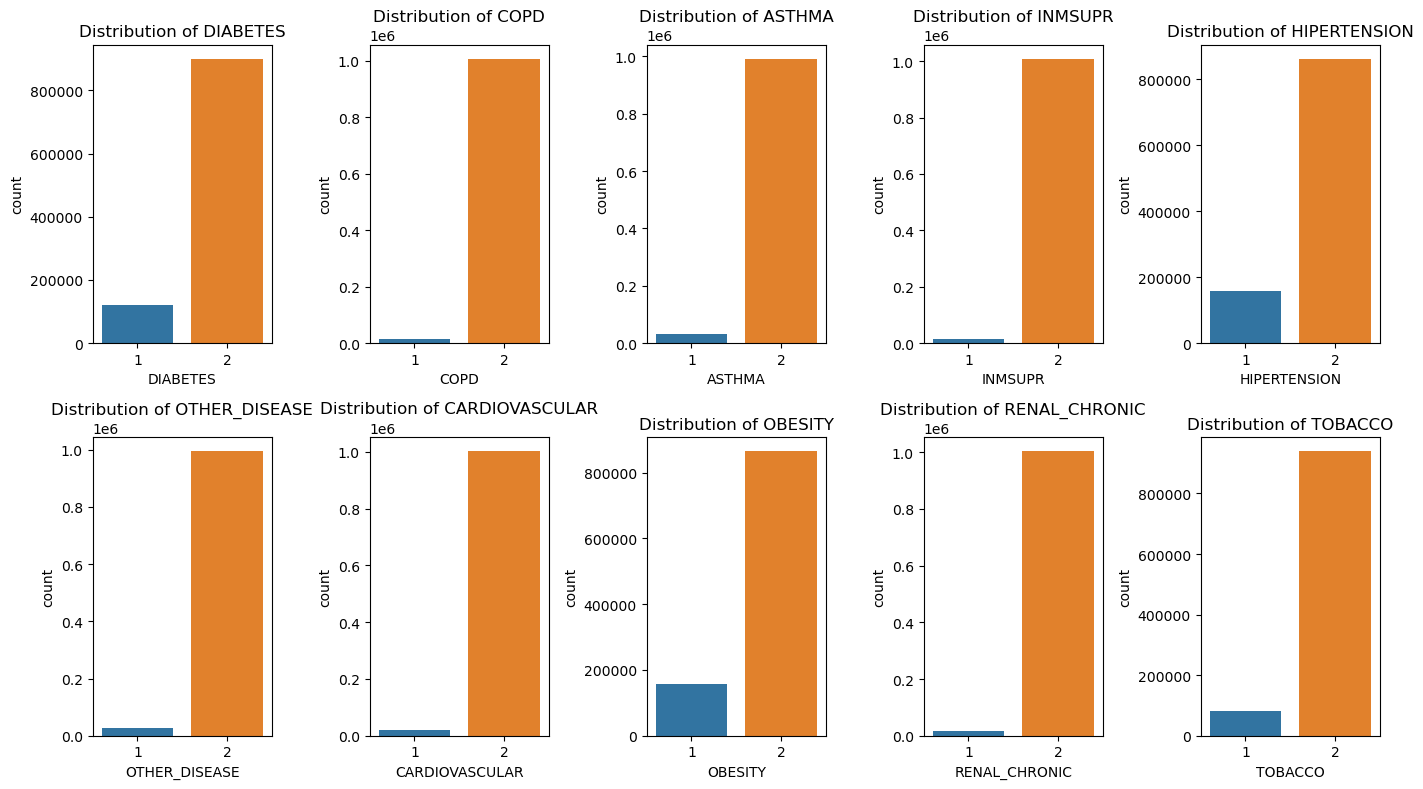

Prevalence of Health Conditions:
DIABETES: 1921782 patients
COPD: 2029596 patients
ASTHMA: 2013538 patients
INMSUPR: 2030396 patients
HIPERTENSION: 1884692 patients
OTHER_DISEASE: 2016870 patients
CARDIOVASCULAR: 2023868 patients
OBESITY: 1887360 patients
RENAL_CHRONIC: 2025634 patients
TOBACCO: 1961416 patients


In [35]:
#What is the prevalence of common health conditions like diabetes, COPD, asthma, etc.?
# List of common health conditions
health_conditions = ['DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']

# Countplot for each health condition
plt.figure(figsize=(14, 8))
for condition in health_conditions:
    plt.subplot(2, 5, health_conditions.index(condition) + 1)
    sns.countplot(data=data, x=condition)
    plt.title(f'Distribution of {condition}')
plt.tight_layout()
plt.show()

# Count the prevalence of each health condition
prevalence_dict = {condition: data[condition].sum() for condition in health_conditions}
print("Prevalence of Health Conditions:")
for condition, count in prevalence_dict.items():
    print(f"{condition}: {count} patients")


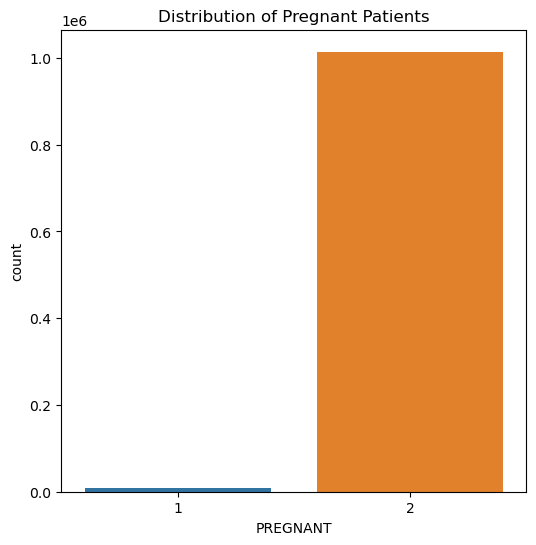

Number of pregnant patients: 2036113


In [36]:

#Among pregnant patients, what is the distribution of other health conditions?
# Countplot for Pregnancy
plt.figure(figsize=(6, 6))
sns.countplot(data=data, x='PREGNANT')
plt.title('Distribution of Pregnant Patients')
plt.show()

# Count the number of pregnant patients
pregnant_count = data['PREGNANT'].sum()
print(f"Number of pregnant patients: {pregnant_count}")


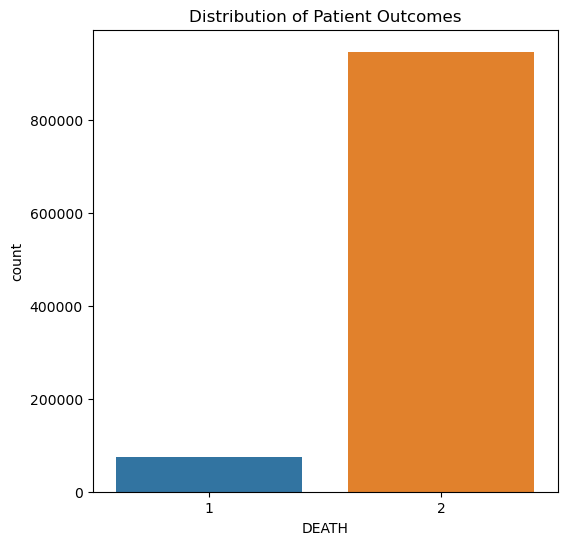

Number of patients who have died: 74657


In [37]:
#How many patients have died (DEATH = 1) in the dataset?

# Countplot for patient outcomes (DEATH)
plt.figure(figsize=(6, 6))
sns.countplot(data=data, x='DEATH')
plt.title('Distribution of Patient Outcomes')
plt.show()

# Count the number of patients who have died
deaths_count = data[data['DEATH'] == 1].shape[0]
print(f"Number of patients who have died: {deaths_count}")


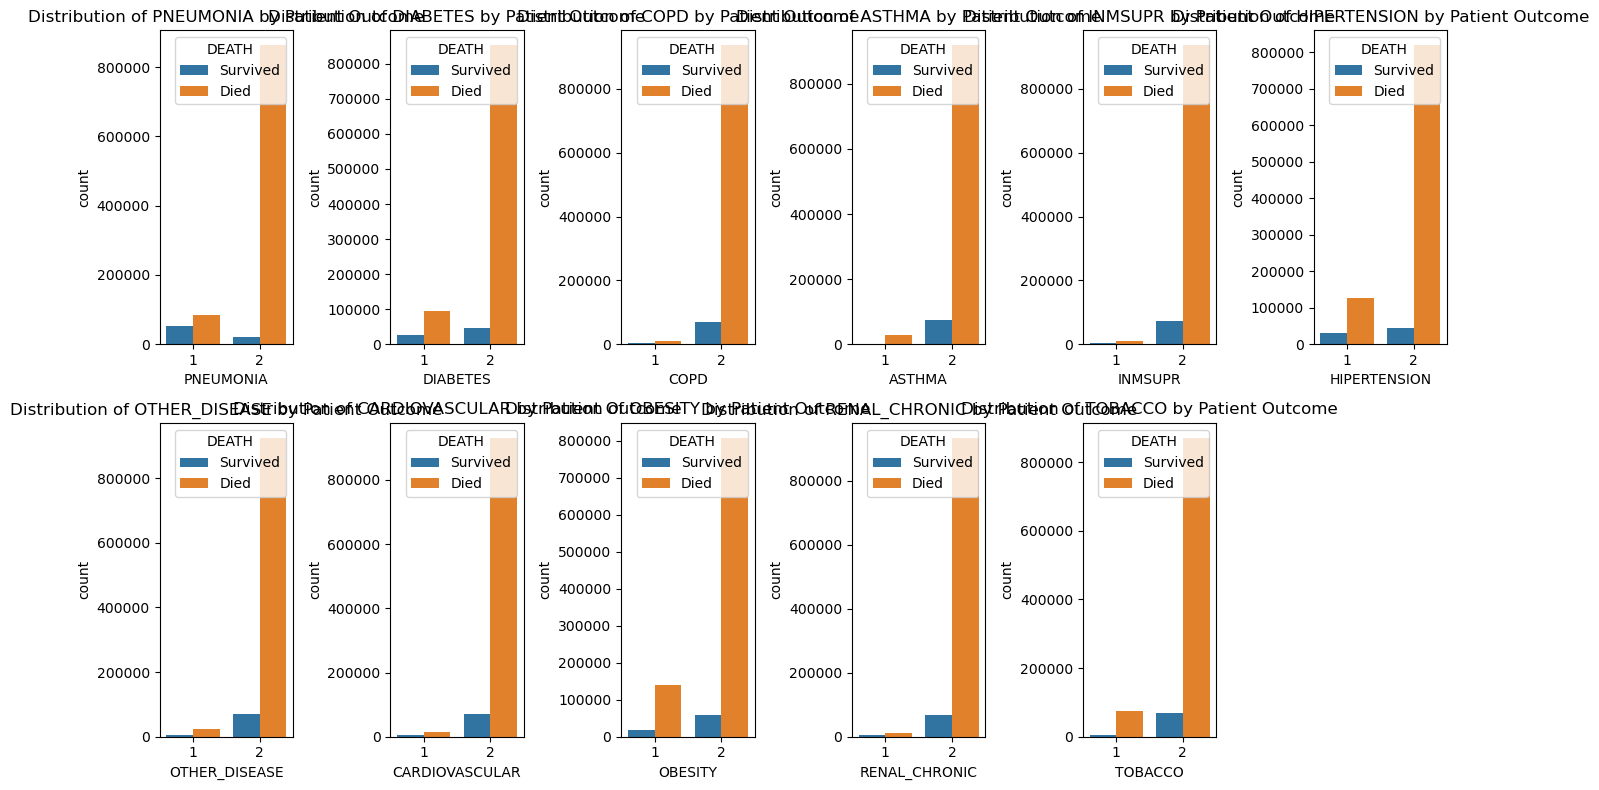

In [38]:
#Distribution of patient outcomes (DEATH) among different conditions
# List of conditions to analyze
conditions_to_analyze = ['PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']

# Countplot for each condition among different outcomes
plt.figure(figsize=(14, 8))
for condition in conditions_to_analyze:
    plt.subplot(2, 6, conditions_to_analyze.index(condition) + 1)
    sns.countplot(data=data, x=condition, hue='DEATH')
    plt.title(f'Distribution of {condition} by Patient Outcome')
    plt.legend(title='DEATH', labels=['Survived', 'Died'])
plt.tight_layout()
plt.show()


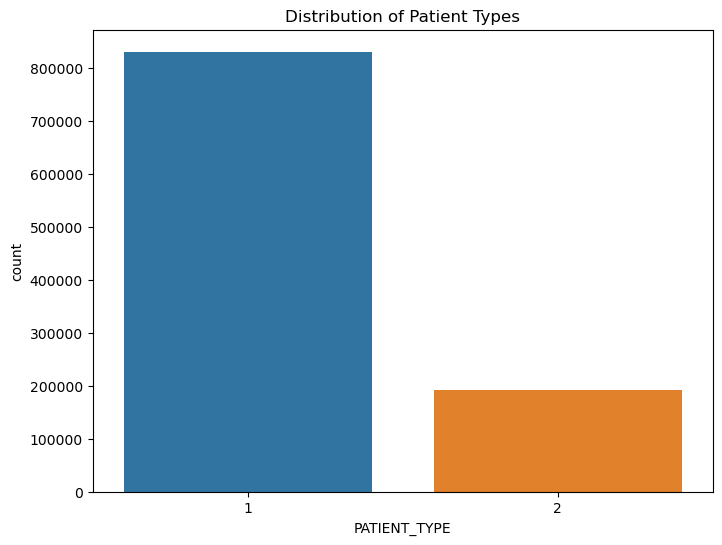

Distribution of Patient Types:
1    830385
2    191592
Name: PATIENT_TYPE, dtype: int64


In [39]:
#Distribution of patient types
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for patient types
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='PATIENT_TYPE')
plt.title('Distribution of Patient Types')
plt.show()

# Count the number of patients for each type
patient_type_counts = data['PATIENT_TYPE'].value_counts()
print("Distribution of Patient Types:")
print(patient_type_counts)


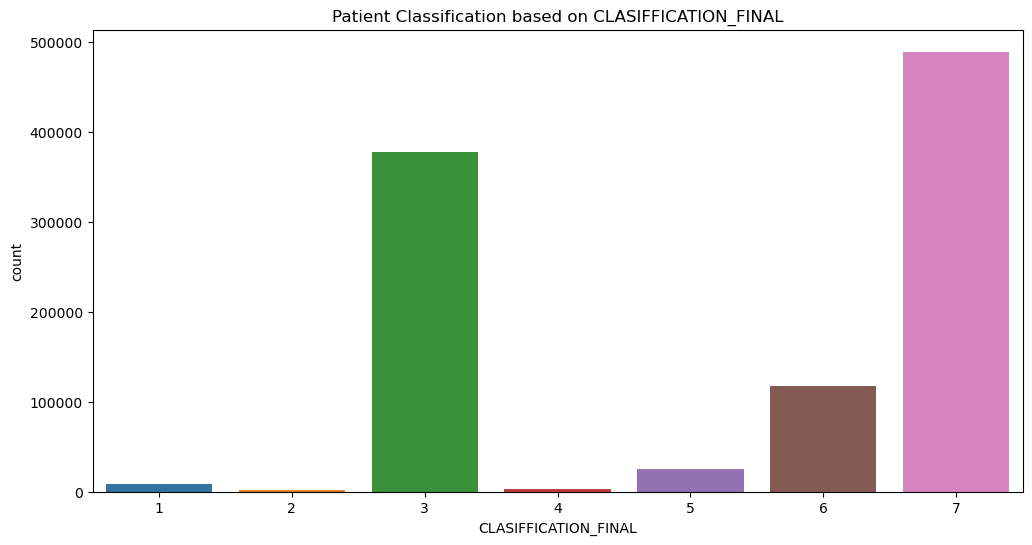

Patient Classification based on CLASIFFICATION_FINAL:
7    488706
3    377378
6    117342
5     25245
1      8417
4      3088
2      1801
Name: CLASIFFICATION_FINAL, dtype: int64


In [40]:
#Patient classification based on the 'CLASIFFICATION_FINAL' column

# Countplot for patient classification
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='CLASIFFICATION_FINAL')
plt.title('Patient Classification based on CLASIFFICATION_FINAL')
plt.show()

# Count the number of patients for each classification
classification_counts = data['CLASIFFICATION_FINAL'].value_counts()
print("Patient Classification based on CLASIFFICATION_FINAL:")
print(classification_counts)

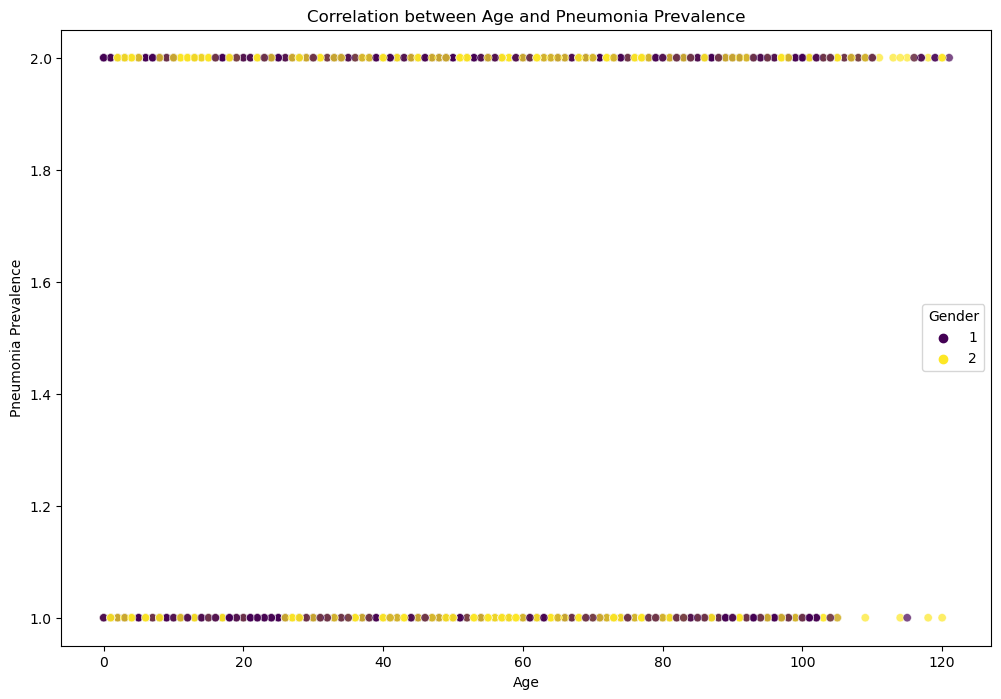

Correlation between Age and Pneumonia Prevalence: -0.28016463017748644


In [41]:
#Correlation between age and health conditions

# Scatterplot for age and prevalence of specific health conditions
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='AGE', y='PNEUMONIA', hue='SEX', palette='viridis', alpha=0.7)
plt.title('Correlation between Age and Pneumonia Prevalence')
plt.xlabel('Age')
plt.ylabel('Pneumonia Prevalence')
plt.legend(title='Gender')
plt.show()

# Calculate correlation coefficient
correlation_age_pneumonia = data['AGE'].corr(data['PNEUMONIA'])
print("Correlation between Age and Pneumonia Prevalence:", correlation_age_pneumonia)


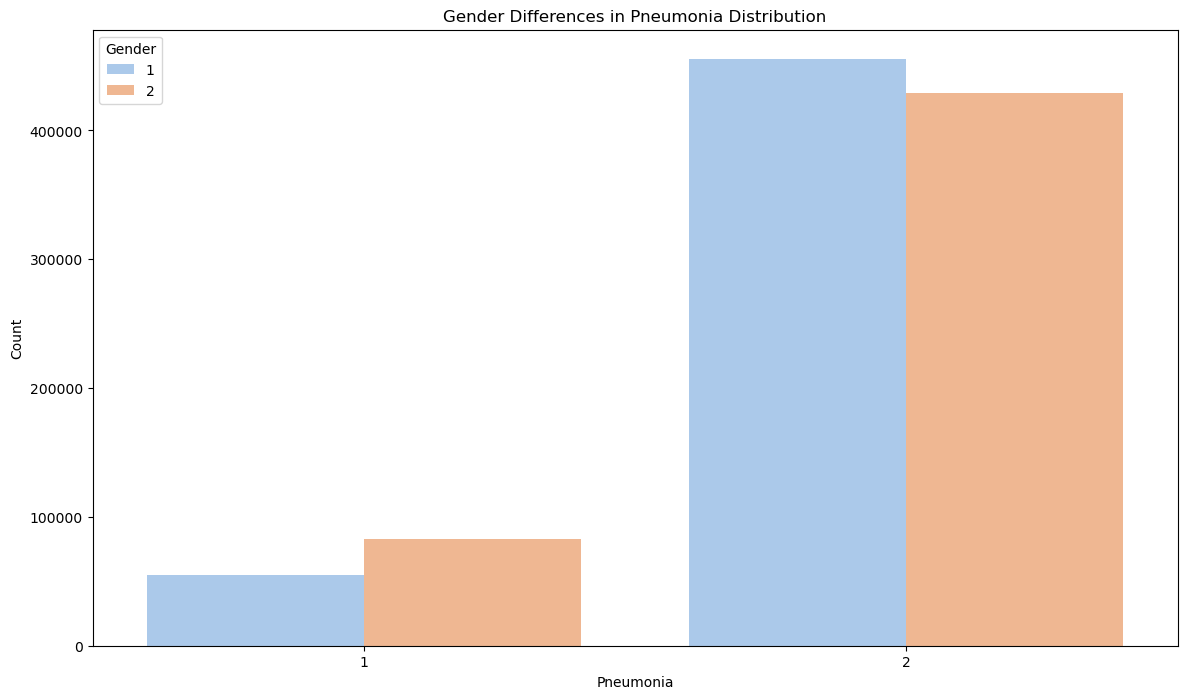

Cross-tabulation of Pneumonia and Sex:
SEX             1       2
PNEUMONIA                
1           54661   82702
2          455380  429234


In [32]:


# Gender differences in the distribution of health conditions
# Countplot for health conditions based on gender
plt.figure(figsize=(14, 8))

# Using seaborn's countplot function with hue for gender differentiation
sns.countplot(x='PNEUMONIA', hue='SEX', palette='pastel', data=data)

plt.title('Gender Differences in Pneumonia Distribution')
plt.xlabel('Pneumonia')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

# Cross-tabulation of Pneumonia and Sex
cross_tab = pd.crosstab(data['PNEUMONIA'], data['SEX'])
print("Cross-tabulation of Pneumonia and Sex:")
print(cross_tab)


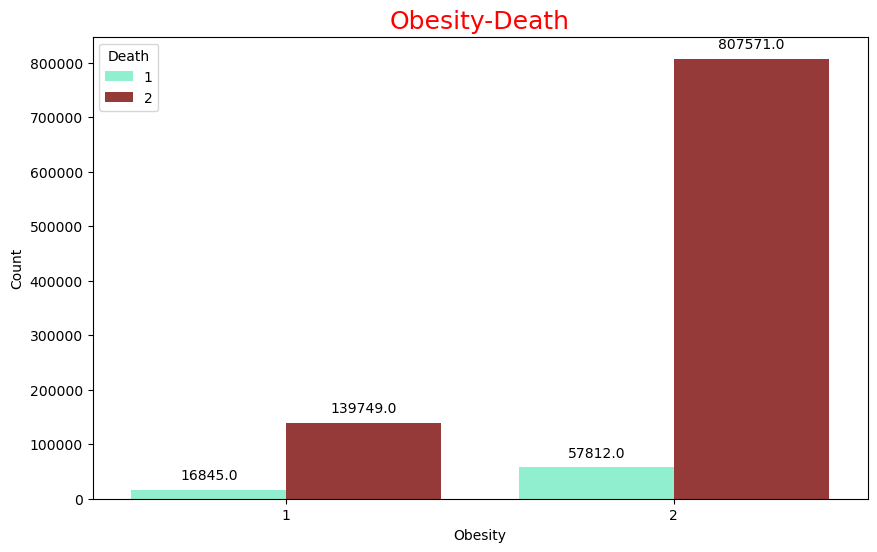

In [33]:

# Countplot for Obesity-Death with hue
plt.figure(figsize=(10, 6))

# Using seaborn's countplot function with hue for Death differentiation
ax = sns.countplot(x='OBESITY', hue='DEATH', palette=["#7fffd4", "#a52a2a"], data=data)

# Add labels and legend
plt.title("Obesity-Death", fontsize=18, color="red")
plt.xlabel("Obesity")
plt.ylabel("Count")
plt.legend(title="Death")

# Add labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


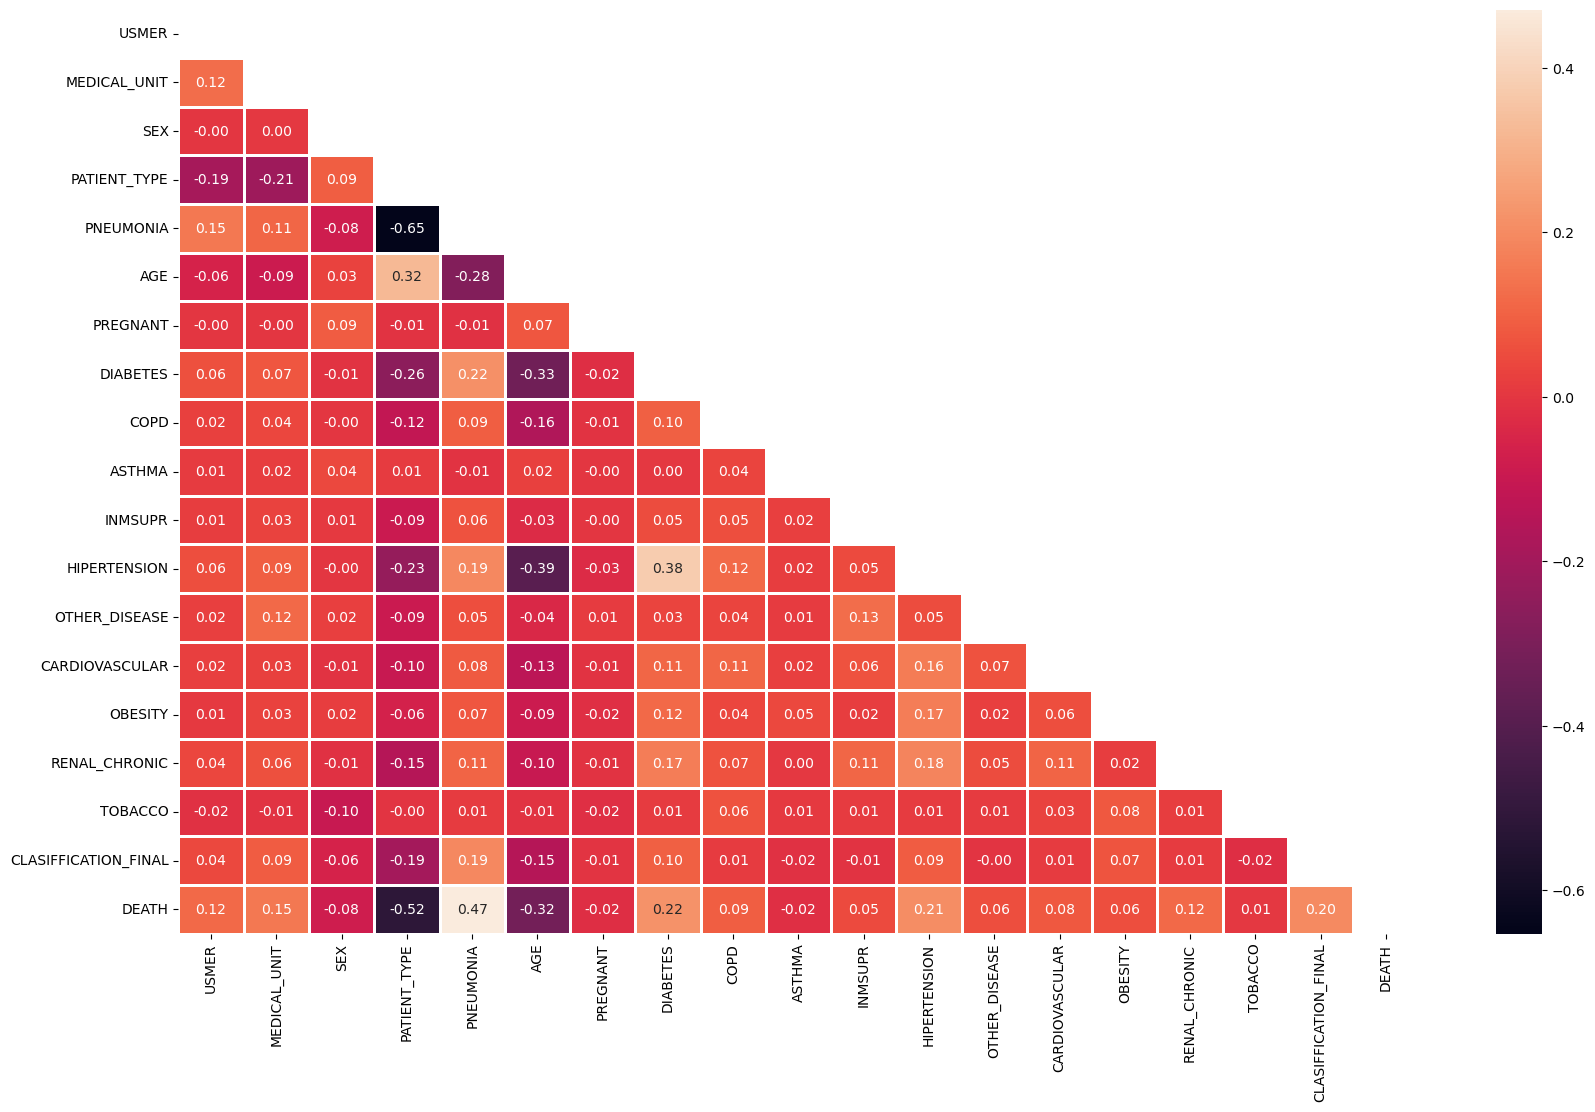

In [44]:
# 6. Correlation Analysis
# This helps identify any features strongly correlated with the diagnosis
# Correlation Between Diagnosis and Other Features
numeric_columns = data.select_dtypes(include='number').columns
plt.figure(figsize = (20, 12))
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

# Machine Learning 

In [34]:
import pandas as pd

# Set the random seed for reproducibility
seed = 42

# Take a random sample of 20% of the rows from the DataFrame
sampled_data = data.sample(frac=0.01, random_state=seed)

# Display the sampled data
print(sampled_data.head())


         USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE  PNEUMONIA  AGE  PREGNANT  \
1027024      2            12    1             1          2   37         2   
515396       2            12    2             1          2   37         2   
213781       1             4    1             2          1   81         2   
437599       2            10    2             1          2   40         2   
626478       2            12    1             1          2   47         2   

         DIABETES  COPD  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
1027024         2     2       2        2             2              2   
515396          2     2       2        2             2              2   
213781          2     2       2        2             1              2   
437599          2     2       2        2             2              2   
626478          2     2       2        2             2              2   

         CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  \
1027024               2        2      

In [35]:
sampled_data.shape

(10220, 19)

In [36]:
data=sampled_data

In [37]:
data.shape

(10220, 19)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [39]:

target_column = 'CLASIFFICATION_FINAL'

# Extract features and target
X = data.drop(target_column, axis=1)
y = data[target_column]

# Handle categorical variables if needed
label_encoder = LabelEncoder()
for column in X.select_dtypes(include='object').columns:
    X[column] = label_encoder.fit_transform(X[column])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model (replace RandomForestClassifier with your chosen algorithm)
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.48043052837573386
Confusion Matrix:
 [[  0   0   3   0   1   1  12]
 [  0   0   4   0   0   1   1]
 [  6   1 324   1   5  59 366]
 [  0   0   2   0   0   0   3]
 [  1   0  20   0   1   2  37]
 [  3   0  83   0   1  33 116]
 [  3   0 249   2  10  69 624]]
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        17
           2       0.00      0.00      0.00         6
           3       0.47      0.43      0.45       762
           4       0.00      0.00      0.00         5
           5       0.06      0.02      0.03        61
           6       0.20      0.14      0.16       236
           7       0.54      0.65      0.59       957

    accuracy                           0.48      2044
   macro avg       0.18      0.18      0.18      2044
weighted avg       0.45      0.48      0.46      2044



In [40]:
data.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'PNEUMONIA', 'AGE',
       'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'CLASIFFICATION_FINAL', 'DEATH'],
      dtype='object')

In [41]:
unrelevant_columns = ["SEX","PREGNANT","COPD","ASTHMA","INMSUPR","OTHER_DISEASE","CARDIOVASCULAR",
                      "OBESITY","TOBACCO"]

data.drop(columns=unrelevant_columns,inplace=True)

In [42]:
data.head()

,USMER,MEDICAL_UNIT,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,HIPERTENSION,RENAL_CHRONIC,CLASIFFICATION_FINAL,DEATH
1027024,2,12,1,2,37,2,2,2,7,2
515396,2,12,1,2,37,2,2,2,3,2
213781,1,4,2,1,81,2,1,2,6,2
437599,2,10,1,2,40,2,2,2,7,2
626478,2,12,1,2,47,2,2,2,3,2


In [43]:
data = pd.get_dummies(data,columns=["MEDICAL_UNIT","CLASIFFICATION_FINAL"],drop_first=True)

In [44]:
#Scaling the numeric feature¶
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
data.AGE = scaler.fit_transform(data.AGE.values.reshape(-1,1))

In [45]:
x = data.drop(columns="DEATH")
y = data["DEATH"]

In [46]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=42)
print("Train_x :",train_x.shape)
print("Test_x :",test_x.shape)
print("Train_y :",train_y.shape)
print("Test_y :",test_y.shape)

Train_x : (8176, 25)
Test_x : (2044, 25)
Train_y : (8176,)
Test_y : (2044,)


In [47]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(train_x,train_y)
print("Logistic Regression Accuracy :",logreg.score(test_x, test_y))

Logistic Regression Accuracy : 0.9437377690802349


In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Separate features and target variable
X = data.drop(columns="DEATH")
y = data["DEATH"]

# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Initialize the logistic regression model
logreg = LogisticRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to find the best hyperparameters
grid_search.fit(train_x, train_y)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
logreg_tuned = LogisticRegression(**best_params)
logreg_tuned.fit(train_x, train_y)

# Make predictions on the test set
predictions_tuned = logreg_tuned.predict(test_x)

# Evaluate the tuned model
accuracy_tuned = accuracy_score(test_y, predictions_tuned)

print("Best Hyperparameters:", best_params)
print("Logistic Regression Accuracy (Tuned):", accuracy_tuned)


Best Hyperparameters: {'C': 100, 'penalty': 'l2'}
Logistic Regression Accuracy (Tuned): 0.9437377690802349


In [64]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score




# Define the numerical and categorical columns
numeric_cols = X.select_dtypes(include='number').columns
categorical_cols = X.select_dtypes(include='object').columns

# Create transformers for numerical and categorical columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
])

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', LogisticRegression())])

# Train the model using the pipeline
pipeline.fit(train_x, train_y)

# Make predictions on the test set
predictions = pipeline.predict(test_x)

# Evaluate the model
accuracy = accuracy_score(test_y, predictions)
print("Logistic Regression Accuracy:", accuracy)


Logistic Regression Accuracy: 0.9437377690802349


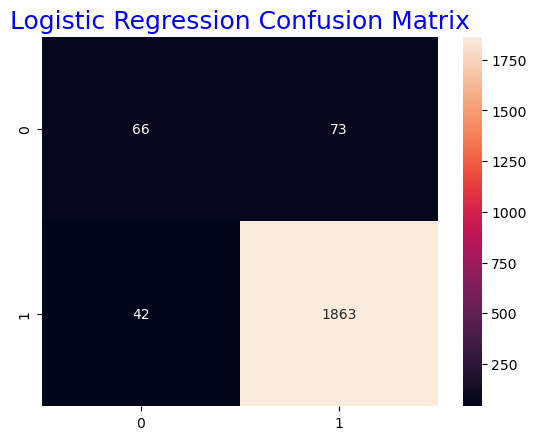

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X and y are your feature and target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Now, you can use the model for predictions
predictions = logreg.predict(X_test)

# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt=".0f")
plt.title("Logistic Regression Confusion Matrix", fontsize=18, color="blue")
plt.show()


In [ ]:
#from imblearn.under_sampling import RandomUnderSampler

#rus = RandomUnderSampler(random_state=0)
#x_resampled,y_resampled = rus.fit_resample(x,y)

#train_x, test_x, train_y, test_y = train_test_split(x_resampled,y_resampled, test_size=0.2, random_state=42)
#print("Train_x :",train_x.shape)
#print("Test_x :",test_x.shape)
#print("Train_y :",train_y.shape)
#print("Test_y :",test_y.shape)

#Logistic Regression After Undersampling¶

#logreg = LogisticRegression()
#logreg.fit(train_x,train_y)
#print("Logistic Regression Accuracy :",logreg.score(test_x, test_y))

#print("Logistic Regression F1 Score :",f1_score(test_y,logreg.predict(test_x),average=None))


#sns.heatmap(confusion_matrix(test_y, logreg.predict(test_x)), annot=True, fmt=".0f")
#plt.title("Logistic Regression Confusion Matrix",fontsize=18, color="red");












#We solved the problem with Undersampling. We also could've used
#Oversampling and probably we would get better accuracy 
#but i think it would be so tiring for computer.

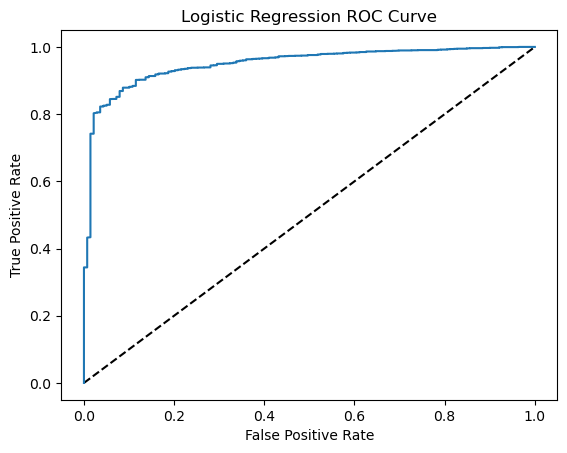

In [71]:
from sklearn.metrics import roc_curve
test_y = test_y.replace({2:1,1:0})
# Probabilities
logreg_pred_proba = logreg.predict_proba(test_x)

fpr, tpr, thresholds = roc_curve(test_y, logreg_pred_proba[:,1])
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

# second algorthim

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Separate features and target variable
X = data.drop(columns="DEATH")
y = data["DEATH"]

# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)


# Train the model
pipeline.fit(train_x, train_y)

# Make predictions on the test set
predictions = pipeline.predict(test_x)

# Evaluate the model
accuracy = accuracy_score(test_y, predictions)

print("Random Forest Accuracy:", accuracy)


Random Forest Accuracy: 0.9437377690802349


In [49]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# Separate features and target variable
X = data.drop(columns="DEATH")
y = data["DEATH"]

# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Create a pipeline with the Random Forest classifier
pipeline = Pipeline([
    ('classifier', rf_model)
])

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the model to find the best hyperparameters
grid_search.fit(train_x, train_y)

# Get the best parameters
best_params = grid_search.best_params_

# Make predictions on the test set with the tuned model
predictions_tuned = grid_search.predict(test_x)

# Evaluate the tuned model
accuracy_tuned = accuracy_score(test_y, predictions_tuned)

print("Best Hyperparameters:", best_params)
print("Accuracy (Tuned):", accuracy_tuned)


Best Hyperparameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 150}
Accuracy (Tuned): 0.9456947162426614


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Separate features and target variable
X = data.drop(columns="DEATH")
y = data["DEATH"]

# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(train_x, train_y)

# Make predictions on the test set
predictions = gb_model.predict(test_x)

# Evaluate the model
accuracy = accuracy_score(test_y, predictions)

print("Gradient Boosting Accuracy:", accuracy)


Gradient Boosting Accuracy: 0.9442270058708415


In [81]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Separate features and target variable
X = data.drop(columns="DEATH")
y = data["DEATH"]

# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],       # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],    # Step size shrinkage used in update to prevent overfitting
    'max_depth': [3, 4, 5]                # Maximum depth of the individual trees
}

# Initialize the Gradient Boosting classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Initialize Grid Search
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='accuracy')

# Fit the Grid Search to find the best parameters
grid_search.fit(train_x, train_y)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
gb_model_tuned = GradientBoostingClassifier(**best_params, random_state=42)
gb_model_tuned.fit(train_x, train_y)

# Make predictions on the test set
predictions_tuned = gb_model_tuned.predict(test_x)

# Evaluate the tuned model
accuracy_tuned = accuracy_score(test_y, predictions_tuned)

print("Best Parameters:", best_params)
print("Tuned Gradient Boosting Accuracy:", accuracy_tuned)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}
Tuned Gradient Boosting Accuracy: 0.9442270058708415


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Separate features and target variable
X = data.drop(columns="DEATH")
y = data["DEATH"]

# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(train_x, train_y)

# Make predictions on the test set
predictions = svm_model.predict(test_x)

# Evaluate the model
accuracy = accuracy_score(test_y, predictions)

print("SVM Accuracy:", accuracy)


SVM Accuracy: 0.9452054794520548


In [80]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Separate features and target variable
X = data.drop(columns="DEATH")
y = data["DEATH"]

# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10],               # Regularization parameter
    'kernel': ['linear', 'rbf'],    # Kernel type
    'gamma': ['scale', 'auto'],     # Kernel coefficient (only for 'rbf' and 'poly' kernels)
}

# Initialize the SVM classifier
svm_model = SVC(random_state=42)

# Initialize Grid Search
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

# Fit the Grid Search to find the best parameters
grid_search.fit(train_x, train_y)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
svm_model_tuned = SVC(**best_params, random_state=42)
svm_model_tuned.fit(train_x, train_y)

# Make predictions on the test set
predictions_tuned = svm_model_tuned.predict(test_x)

# Evaluate the tuned model
accuracy_tuned = accuracy_score(test_y, predictions_tuned)

print("Best Parameters:", best_params)
print("Tuned SVM Accuracy:", accuracy_tuned)


Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Tuned SVM Accuracy: 0.9447162426614482


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Separate features and target variable
X = data.drop(columns="DEATH")
y = data["DEATH"]

# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(train_x, train_y)

# Make predictions on the test set
predictions = knn_model.predict(test_x)

# Evaluate the model
accuracy = accuracy_score(test_y, predictions)

print("KNN Accuracy:", accuracy)


KNN Accuracy: 0.9300391389432485


In [79]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Separate features and target variable
X = data.drop(columns="DEATH")
y = data["DEATH"]

# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Initialize the KNN classifier
knn_model = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')

# Perform GridSearchCV on the training data
grid_search.fit(train_x, train_y)

# Get the best parameters
best_params = grid_search.best_params_

# Train the KNN model with the best parameters
best_knn_model = KNeighborsClassifier(**best_params)
best_knn_model.fit(train_x, train_y)

# Make predictions on the test set
predictions = best_knn_model.predict(test_x)

# Evaluate the model
accuracy = accuracy_score(test_y, predictions)

print("Best Parameters:", best_params)
print("KNN Accuracy:", accuracy)


Best Parameters: {'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
KNN Accuracy: 0.9339530332681018


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Separate features and target variable
X = data.drop(columns="DEATH")
y = data["DEATH"]

# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(train_x, train_y)

# Make predictions on the test set
predictions = dt_model.predict(test_x)

# Evaluate the model
accuracy = accuracy_score(test_y, predictions)

print("Decision Tree Accuracy:", accuracy)


Decision Tree Accuracy: 0.925146771037182


In [78]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Separate features and target variable
X = data.drop(columns="DEATH")
y = data["DEATH"]

# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_x, train_y)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
dt_model_tuned = DecisionTreeClassifier(random_state=42, **best_params)
dt_model_tuned.fit(train_x, train_y)

# Make predictions on the test set
predictions = dt_model_tuned.predict(test_x)

# Evaluate the tuned model
accuracy = accuracy_score(test_y, predictions)

print("Best Parameters:", best_params)
print("Tuned Decision Tree Accuracy:", accuracy)


Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Tuned Decision Tree Accuracy: 0.9334637964774951


# Pipline 

In [83]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Separate features and target variable
X = data.drop(columns="DEATH")
y = data["DEATH"]

# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipelines for each classifier
rf_pipeline = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])

gb_pipeline = Pipeline([
    ('classifier', GradientBoostingClassifier(random_state=42))
])

svm_pipeline = Pipeline([
    ('classifier', SVC(random_state=42))
])

knn_pipeline = Pipeline([
    ('classifier', KNeighborsClassifier())
])

dt_pipeline = Pipeline([
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# List of pipelines for easy iteration
pipelines = [rf_pipeline, gb_pipeline, svm_pipeline, knn_pipeline, dt_pipeline]
pipeline_names = ['Random Forest', 'Gradient Boosting', 'SVM', 'KNN', 'Decision Tree']

# Train and evaluate each model
for pipeline, name in zip(pipelines, pipeline_names):
    pipeline.fit(train_x, train_y)
    predictions = pipeline.predict(test_x)
    accuracy = accuracy_score(test_y, predictions)
    print(f"{name} Accuracy: {accuracy}")


Random Forest Accuracy: 0.9324853228962818
Gradient Boosting Accuracy: 0.9442270058708415
SVM Accuracy: 0.9452054794520548
KNN Accuracy: 0.9300391389432485
Decision Tree Accuracy: 0.925146771037182


In [84]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = data.drop(columns="DEATH")
y = data["DEATH"]

# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Define pipelines for each algorithm
pipelines = {
    'RandomForest': Pipeline([('classifier', RandomForestClassifier())]),
    'GradientBoosting': Pipeline([('classifier', GradientBoostingClassifier())]),
    'SVM': Pipeline([('scaler', StandardScaler()), ('classifier', SVC())]),
    'KNN': Pipeline([('scaler', StandardScaler()), ('classifier', KNeighborsClassifier())]),
    'DecisionTree': Pipeline([('classifier', DecisionTreeClassifier())])
}

# Define hyperparameter grids for tuning
param_grids = {
    'RandomForest': {
        'classifier__n_estimators': [50, 100, 150],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    'GradientBoosting': {
        'classifier__n_estimators': [50, 100, 150],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 4, 5]
    },
    'SVM': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    },
    'KNN': {
        'classifier__n_neighbors': [3, 5, 7],
        'classifier__weights': ['uniform', 'distance']
    },
    'DecisionTree': {
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    }
}

# Fit and tune models
for model_name, pipeline in pipelines.items():
    print(f"Training and tuning {model_name}...")
    
    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=5, scoring='accuracy')
    grid_search.fit(train_x, train_y)
    
    # Get the best parameters
    best_params = grid_search.best_params_
    
    # Update the pipeline with the best parameters
    pipeline.set_params(**best_params)
    
    # Fit the model on the training data
    pipeline.fit(train_x, train_y)
    
    # Make predictions on the test set
    predictions = pipeline.predict(test_x)
    
    # Evaluate the model
    accuracy = accuracy_score(test_y, predictions)
    
    print(f"{model_name} - Best Parameters:", best_params)
    print(f"{model_name} - Accuracy:", accuracy)
    print("\n")


Training and tuning RandomForest...
RandomForest - Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}
RandomForest - Accuracy: 0.9427592954990215


Training and tuning GradientBoosting...
GradientBoosting - Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 4, 'classifier__n_estimators': 50}
GradientBoosting - Accuracy: 0.9442270058708415


Training and tuning SVM...
SVM - Best Parameters: {'classifier__C': 0.1, 'classifier__kernel': 'linear'}
SVM - Accuracy: 0.9432485322896281


Training and tuning KNN...
KNN - Best Parameters: {'classifier__n_neighbors': 7, 'classifier__weights': 'uniform'}
KNN - Accuracy: 0.9319960861056752


Training and tuning DecisionTree...
DecisionTree - Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10}
DecisionTree - Accuracy: 0.9275929549902152




# Finish

In [86]:
#In this project i predicted "Death" situation with %90 accuracy.